#### Load the necessary files

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from time import time

# load main pca function using Marcenko-Pastur distribution
from dipy.denoise.localpca import mppca

# load functions to fetch data for this example
from dipy.data import get_fnames

# load other dipy's functions that will be used for auxiliar analysis
from dipy.core.gradients import gradient_table
from dipy.io.image import load_nifti
from dipy.io.gradients import read_bvals_bvecs
from dipy.segment.mask import median_otsu
import dipy.reconst.dki as dki

#### Denoise the data with Marchenko-Pastur 
(done via Mrtrix, data provided with supplement)

In [2]:
dwi_fname, dwi_bval_fname, dwi_bvec_fname, _ = get_fnames('cfin_multib')
data, affine = load_nifti(dwi_fname)
bvals, bvecs = read_bvals_bvecs(dwi_bval_fname, dwi_bvec_fname)
gtab = gradient_table(bvals, bvecs)

In [3]:
bvals = gtab.bvals
bvecs = gtab.bvecs

In [4]:
maskdata, mask = median_otsu(data, vol_idx=[0, 1])

#### Load the denoised output -- File path needs to change

In [5]:
denoised_arr, _ = load_nifti('./den_cfin.nii.gz')

#### Fit the DKI model to the raw data and Marchenko-Pastur Denoised data

In [6]:
dkimodel = dki.DiffusionKurtosisModel(gtab)

dki_orig = dkimodel.fit(data, mask)
dki_den = dkimodel.fit(denoised_arr, mask)

#### Plot the kurtosis fit measures from DKI for both Raw Data (top row) and Marchenko-Pastur Denoised Data (Bottom Row)

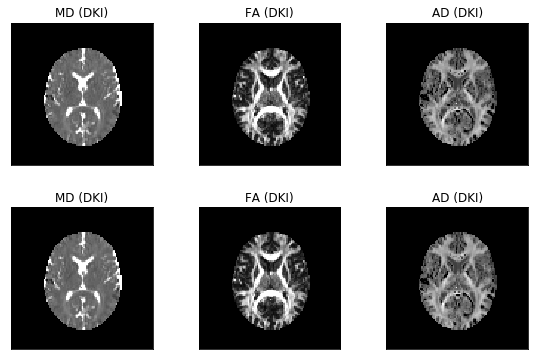

The result saved in denoised_dki.png


In [7]:
sli = sli = data.shape[2]//2

FA_orig = dki_orig.fa
FA_den = dki_den.fa
MD_orig = dki_orig.md
MD_den = dki_den.md
MK_orig = dki_orig.mk(0, 3)
MK_den = dki_den.mk(0, 3)


fig2, ax = plt.subplots(2, 3, figsize=(10, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig2.subplots_adjust(hspace=0.3, wspace=0.03)

ax.flat[0].imshow(MD_orig[:, :, sli].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[0].set_title('MD (DKI)')
ax.flat[1].imshow(FA_orig[:, :, sli].T, cmap='gray', vmin=0, vmax=0.7,
                  origin='lower')
ax.flat[1].set_title('FA (DKI)')
ax.flat[2].imshow(MK_orig[:, :, sli].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[2].set_title('AD (DKI)')
ax.flat[3].imshow(MD_den[:, :, sli].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[3].set_title('MD (DKI)')
ax.flat[4].imshow(FA_den[:, :, sli].T, cmap='gray', vmin=0, vmax=0.7,
                  origin='lower')
ax.flat[4].set_title('FA (DKI)')
ax.flat[5].imshow(MK_den[:, :, sli].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[5].set_title('AD (DKI)')
plt.show()
fig2.savefig('denoised_dki.png')

print("The result saved in denoised_dki.png")

#### Repeat the same analysis with Patch2Self

In [17]:
denoised_arr1 = load_nifti('./cfin_p2s_1.nii.gz')

In [18]:
dki_den1 = dkimodel.fit(denoised_arr1, mask)

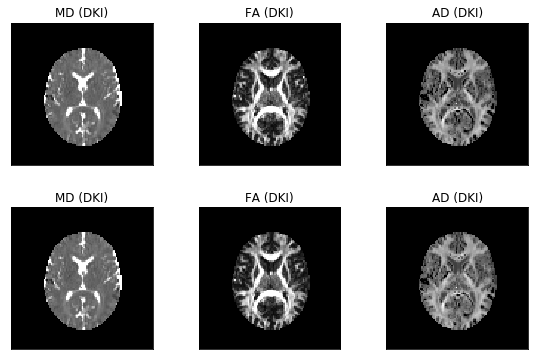

The result saved in denoised_dki.png


In [19]:
sli = data.shape[2]//2

FA_orig = dki_orig.fa
FA_den1 = dki_den1.fa
MD_orig = dki_orig.md
MD_den1 = dki_den1.md
MK_orig = dki_orig.mk(0, 3)
MK_den1 = dki_den1.mk(0, 3)


fig2, ax = plt.subplots(2, 3, figsize=(10, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig2.subplots_adjust(hspace=0.3, wspace=0.03)

ax.flat[0].imshow(MD_orig[:, :, sli].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[0].set_title('MD (DKI)')
ax.flat[1].imshow(FA_orig[:, :, sli].T, cmap='gray', vmin=0, vmax=0.7,
                  origin='lower')
ax.flat[1].set_title('FA (DKI)')
ax.flat[2].imshow(MK_orig[:, :, sli].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[2].set_title('AD (DKI)')
ax.flat[3].imshow(MD_den1[:, :, sli].T, cmap='gray', vmin=0, vmax=2.0e-3,
                  origin='lower')
ax.flat[3].set_title('MD (DKI)')
ax.flat[4].imshow(FA_den1[:, :, sli].T, cmap='gray', vmin=0, vmax=0.7,
                  origin='lower')
ax.flat[4].set_title('FA (DKI)')
ax.flat[5].imshow(MK_den1[:, :, sli].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[5].set_title('AD (DKI)')
plt.show()
fig2.savefig('denoised_dki.png')

print("The result saved in denoised_dki.png")